# TrES-3b transmission spectroscopy: narrow-band light curve plot

*<a href="mailto:hannu.parviainen@physics.ox.ac.uk">Hannu Parviainen</a>, University of Oxford*

Here we plot the narrow-band light curves and the models corresponding to the posterior medians. These plots are used in the paper.

**Note:** We could also plot the percentile ranges of the posterior model distributions. However, these are too narrow (close to the line width) to make any real difference, and are omitted.

This notebook is a part in a series of notebooks working as an appendix to Parviainen et al. (2015, submitted), aiming to make the analysis presented in the paper easily reproductable. The results and the figures presented in the paper can be reproduced by following these notebooks in the numbered order.

*Dependencies:* See `000_README.ipynb` for the list of required Python packages, and how to install them.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from george import GP
from lpf_gp import LPFunction as LPF
from core import *

In [3]:
cp = [sb.desaturate(cm.nipy_spectral(.1+i/19.), 0.5) for i in range(17)]
    
ddir   = 'results'
dfiles = ['TrES_3b_color_nomask_gp_mc.npz',
          'TrES_3b_color_masked_gp_mc.npz']

In [4]:
chains = [load(join(ddir,f))['chains'] for f in dfiles]
fcs    = [ch.reshape([-1,ch.shape[-1]]) for ch in chains]
mpvs   = [median(fc, 0) for fc in fcs]

In [5]:
df_aux = pd.read_hdf('results/light_curves.h5', 'aux')
df_gph = pd.read_hdf('results/light_curves.h5', 'gp_hyperparameters/masked')
df_lcr = pd.read_hdf('results/light_curves.h5', 'final/nb_nomask')
df_lcm = pd.read_hdf('results/light_curves.h5', 'final/nb_masked')
mask    = array(df_aux.bad_mask, dtype=np.bool)

time = array(df_aux.mjd-56846+0.5)[mask]
airmass = array(df_aux.airmass)[mask]
fluxes = [array(df_lc)[mask,:] for df_lc in [df_lcr, df_lcm]]

lpf = LPF(time, fluxes[1], airmass, df_gph, nthreads=4)

In [6]:
fo = lpf.flux_o
fm = lpf.compute_lc_model(mpvs[1])
fb = lpf.compute_baseline(mpvs[1])
fp = lpf.gps[0].predict(fo[:,0]-fm[:,0], lpf.time, mean_only=True)

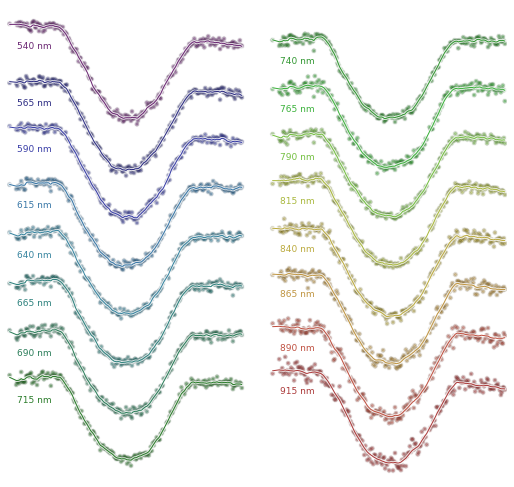

In [7]:
offset_f, offset_t = 0.015, 0.11
fig,ax = subplots(1,1, figsize=(AAPGW,0.95*AAPGW))
for icol in range(2):
    for ipb in range(8):
        i = icol*8+ipb
        fg = lpf.gps[i].predict(fo[:,i]-fm[:,i], lpf.time, mean_only=True)
        toff, foff = icol*offset_t, (7-ipb)*offset_f
        ctime = time+toff
        cfobs = fo[:,i]+foff
        cfmod = fm[:,i]+fg+foff
        [ax.scatter(ctime, cfobs, marker='o', c=cp[i], s=4*(s), alpha=a) for s,a in zip([8,4,1],[0.05,0.3,0.4])]
        [ax.plot(ctime, cfmod, lw=w, c=c, alpha=a) for w,c,a in zip([3,1],['w',cp[i]],[0.8,1])]
        ax.text(time[2]+toff, cfmod[10]-0.007, '{:d} nm'.format(int(pb_centers[i])), color=cp[i], size=9)
sb.despine(left=True, bottom=True)
setp(ax, yticks=[], xticks=[], xlim=[time[0]-0.001,time[-1]+offset_t+0.001], ylim=(0.97,1+8*offset_f-0.005))
fig.tight_layout()
fig.subplots_adjust(left=0.01, right=0.99, bottom=0.01)
fig.savefig('plots/pub_nb_lcs_uncorrected.pdf')

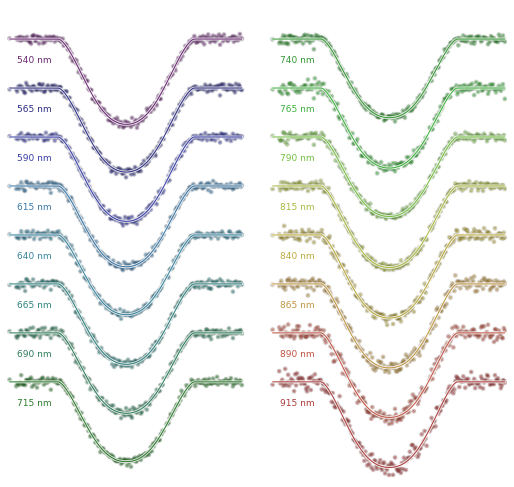

In [8]:
offset_f, offset_t = 0.015, 0.11

fig,ax = subplots(1,1, figsize=(AAPGW,0.95*AAPGW))
for icol in range(2):
    for ipb in range(8):
        i = icol*8+ipb
        fg = lpf.gps[i].predict(fo[:,i]-fm[:,i], lpf.time, mean_only=True)
        toff, foff = icol*offset_t, (7-ipb)*offset_f
        ctime = time+toff
        cfobs = fo[:,i]/fb[:,i]-fg+foff
        cfmod = fm[:,i]/fb[:,i]+foff
        [ax.scatter(ctime, cfobs, marker='o', c=cp[i], s=4*(s), alpha=a) for s,a in zip([8,4,1],[0.05,0.3,0.4])]
        [ax.plot(ctime, cfmod, lw=w, c=c, alpha=a) for w,c,a in zip([3,1],['w',cp[i]],[0.8,1])]
        ax.text(time[2]+toff, cfmod[10]-0.007, '{:d} nm'.format(int(pb_centers[i])), color=cp[i], size=9)
sb.despine(left=True, bottom=True)
setp(ax, yticks=[], xticks=[])
setp(ax, yticks=[], xticks=[], xlim=[time[0]-0.001,time[-1]+offset_t+0.001], ylim=(0.97,1+8*offset_f-0.005))
fig.tight_layout()
fig.subplots_adjust(left=0.01, right=0.99, bottom=0.01)
fig.savefig('plots/pub_nb_lcs_corrected.pdf')

---
<center> &copy; 2015 <a href="mailto:hannu.parviainen@physics.ox.ac.uk">Hannu Parviainen</a></center>